# **Tutorial 2: Logistic Regression**

---



**Week 2, Day 5: Climate Response: adaptation and impact**

**By Climatematch Academy**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ 

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

___
# **Tutorial Objectives**

*Estimated timing of tutorial: 10 minutes*

Welcome to tutorial 2 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial we will learn implement Logistic Regression. Specifically, by the end of this tutorial, you will be able to:

- Generate synthetic data
- Implement logistic regression to classify using scikit learn
- Evaluate the performance of the learned model
- Understand the how the learned model behaves on new unseen data with the same and different relationsip


---

In [ ]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)



---
# **Setup**

In [ ]:
#@title Import necessary libraries:

import numpy as np  # Import the numpy library as np - used for array computing and linear algebra operations
from sklearn.linear_model import LogisticRegression  # Import the LogisticRegression class from the scikit-learn linear_model module - used for logistic regression analysis
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function from the scikit-learn metrics module - used for evaluating classification model performance
import matplotlib.pyplot as plt  # Import the pyplot module from the matplotlib library - used for data visualization

<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>
**NOTE :**  Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a "`ModuleNotFoundError: No module named 'library name'`" error , please run "`pip install 'library name'`" to install the required module.

--- 
# **Section 1: Logistic Regression**
---





In [ ]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

Logistic regression is built from the same fundamentals as linear regression but can be applied to classification problems instead of just regression. Here we will create synthetic data that represents a binary classification problem: 

\begin{align}
 y = H( \alpha x_1 + (1-\alpha) x_2 + \beta \epsilon)
\end{align}

Here, H represents the Heaviside function, which sets all negative values to 0 and all positive values to 1. By applying this function, each data point will have a label of 0 or 1, indicating which of two categories it belongs to. The goal of the logisitic regression will be to recover this relationship and therefore learn how to correctly classify new inputs. 

---
## **Section 1.1:  Generating the Synthetic Data**
---



As we did in the previous tutorial on linear regression, we will generate synthetic data in a similar way.

In [ ]:
#@title Synthetic classification data 

data_points = 100  # Set the number of data points to be generated
x_1 = np.random.randn(data_points)  # Generate random values for the first regressor using a normal distribution
x_2 = np.random.randn(data_points)  # Generate random values for the second regressor using a normal distribution

alpha = .5  # Set a weight for the first regressor
beta = .1  # Set a weighting factor for the noise

def y_func(weights,regressors,noise):
    """
    This function computes the output values for a synthetic classification problem, given input weights, regressors, and noise.

    Parameters:
    weights (numpy array): A 1 x r array of weights, where r is the number of regressors
    regressors (numpy array): An r x d array of regressors, where d is the number of data points
    noise (scalar): A scalar value for the weighting of the noise added to the output values

    Returns:
    numpy array: A 1 x d array of output values computed using the input weights, regressors, and noise
    """
    return np.heaviside(np.dot(weights,regressors) + noise*np.random.randn(regressors.shape[1]),0) 

# Generate the output values for the synthetic classification problem using the y_func function
y = y_func(np.array([alpha,1-alpha]),np.array([x_1,x_2]),beta)



---


## **Section 1.2 Fitting Model and Analyzing Results **

---



Just as with linear regression, we will use the sklearn object to build a logistic regression model


In [ ]:
#@title  Logistic regression model building

logreg_model = LogisticRegression()  # Initialize the logistic regression model object
regressors = np.array([x_1,x_2])  # Create a numpy array called regressors to hold the input variables (x_1 and x_2)
logreg_model.fit(regressors.T,y)  # Fit the logistic regression model using the input variables and output variable (y)

LogisticRegression()

The logistic regression model has now been trained. To evaluate its performance, we cannot rely on the coefficient of determination as we did for linear regression. Instead, we need metrics that are specific to classification problems. First we will plot a confusion matrix, which shows how many data points of a given category are classified as different categories. Then we will look at the overall accuracy (the percentage of data points that are correctly classified). 

'Percent correct is 99.0'

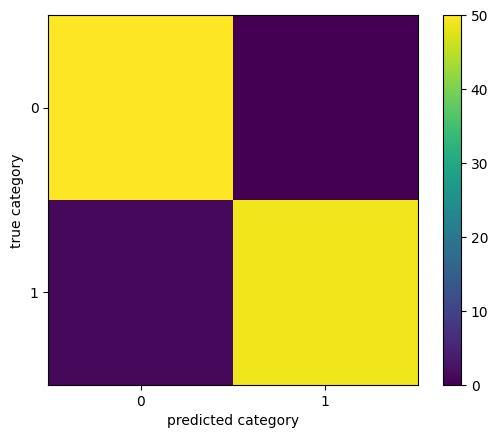

In [ ]:
#@title Prediction and evaluation of logistic regression model

preds = logreg_model.predict(regressors.T)  # Predict the output using the logistic regression model and input variables
cm = confusion_matrix(y, preds)  # Compute the confusion matrix using the predicted and actual output values
plt.imshow(cm); plt.xticks([0,1]); plt.yticks([0,1])  # Plot the confusion matrix using pyplot
plt.ylabel('true category'); plt.xlabel('predicted category')  # Add x and y axis labels
plt.colorbar()  # Add colorbar to the plot

'Percent correct is ' + str(100*logreg_model.score(regressors.T, y))  # Compute the percentage of correct predictions using the logistic regression model and input/output variables


<details>
<summary> <font color='yellow'>Click here description of plot  </font></summary>
The plot shows a confusion matrix, which is a way of visualizing how well a binary classification model is performing. The rows represent the true class labels, and the columns represent the predicted class labels. The color of each cell indicates the number of instances that fall into that category. The diagonal cells indicate correct predictions, while the off-diagonal cells indicate incorrect predictions. The percentage of correct predictions by the logistic regression model is printed at the end.

As we can see, the model has a high accuracy.  However, this accuracy is based on the same data the model was trained on. How well do you think the model will perform when tested on new, unseen data?




---


## **Section 1.3 Test the Model on New Unseen x Values**


---



### Coding Exercise 1.2: Evaluate the model performance on new unseen data

For the first exercise, once again, like with linear regression, evaluate the model on test data it was not trained on. 

*Exercise Objextive*: Create a new dataset assuming the same relationship but a different sample of x values and test the model's performance.

In [ ]:
#################################################
## TODO for students
# Fill out function and remove
raise NotImplementedError("Student exercise 1.1: Fill out the code to evaluate model performance on new unseen data.")
#################################################

# Generate 100 numbers from a Gaussian distribution with zero mean 
x_1_test1 = np.random.randn(data_points)
x_2_test1 = np.random.randn(data_points)

# Create an array of x values
regressors_test1 = np.array([x_1_test1, x_2_test1])

#Assuming the same relationship of alpha =.5 and beta = .1 as set above,calculate the true y values:
y_test1 = y_func(np.array([alpha, 1-alpha]),..., beta)

# Use the logistic regression model to make predictions on the new x values
preds =  logreg_model.predict(...)

# Calculate the confusion matrix for the model's predictions
cm = confusion_matrix(...,...)

# Visualize the confusion matrix as an image with labeled ticks
# plt.imshow(cm); plt.xticks([0,1]); plt.yticks([0,1])
# plt.ylabel('true category'); plt.xlabel('predicted category')
# plt.colorbar()

# Print the percent of correct predictions by the logistic regression model
#'Percent correct is ' + str(100*logreg_model.score(regressors_test1.T,y_test1))


NotImplementedError: ignored

'Percent correct is 95.0'

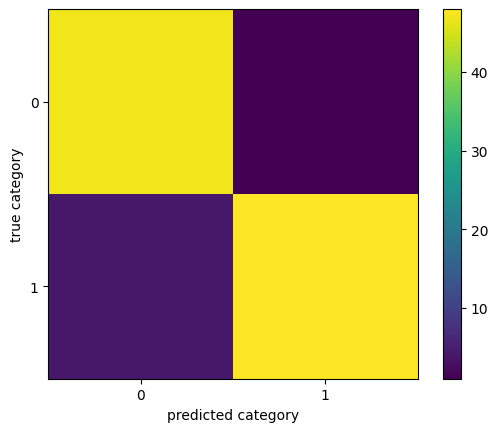

In [ ]:
# to_remove solution

# Generate 100 numbers from a Gaussian distribution with zero mean 
x_1_test1 = np.random.randn(data_points)
x_2_test1 = np.random.randn(data_points)

# Create an array of x values
regressors_test1 = np.array([x_1_test1, x_2_test1])

#Assuming the same relationship of alpha =.5 and beta = .1 as set above,calculate the true y values:
y_test1 = y_func(np.array([alpha,1-alpha]),regressors_test1, beta)

# Use the logistic regression model to make predictions on the new x values
preds = logreg_model.predict(regressors_test1.T)

# Calculate the confusion matrix for the model's predictions
cm = confusion_matrix(y_test1, preds)

# Visualize the confusion matrix as an image with labeled ticks
plt.imshow(cm); plt.xticks([0,1]); plt.yticks([0,1])
plt.ylabel('true category'); plt.xlabel('predicted category')
plt.colorbar()

# Print the percent of correct predictions by the logistic regression model
'Percent correct is ' + str(100*logreg_model.score(regressors_test1.T, y_test1))

As the plot and percent correct show, the model does well on this new data!

But what if something changed between when we collected data to train the model and when we collected a second data set to test it on? Then the relationship between x and y may have changed. Would the model still work well?



---


## Section 1.4: Check the Model on a New Dataset with a Slightly Different Relationship.
**bold text**

---



### Coding Exercise 1.3: Evaluate the model perfromance on  a new dataset with a slightly different relationship.

*Exercise Objective*: Create a new dataset assuming the different relationship and a different sample of x values and then test the model's performance.

In [ ]:
#################################################
## TODO for students
# Fill out function and remove
raise NotImplementedError("Student exercise 1.1: Fill out the code to evaluate model performance on new unseen data.")
#################################################


# Generate 100 numbers from a Gaussian distribution with zero mean 
x_1_test2 = np.random.randn(data_points)
x_2_test2 = np.random.randn(data_points)

# Create an array of x values
regressors_test2 = np.array([x_1_test2, x_2_test2])

#Assuming a different relationship (alpha = .8), we can calculate the true y values:
alpha = .8
y_test2 = ...

# Use the logistic regression model to make predictions on the new x values
preds = ...

# Calculate the confusion matrix for the model's predictions
cm = ...

# Visualize the confusion matrix as an image with labeled ticks
# plt.imshow(cm); plt.xticks([0,1]); plt.yticks([0,1])
# plt.ylabel('true category'); plt.xlabel('predicted category')
# plt.colorbar()

# Print the percent of correct predictions by the logistic regression model
# 'Percent correct is ' + str(100*logreg_model.score(regressors_test2.T,y_test2))

'Percent correct is 88.0'

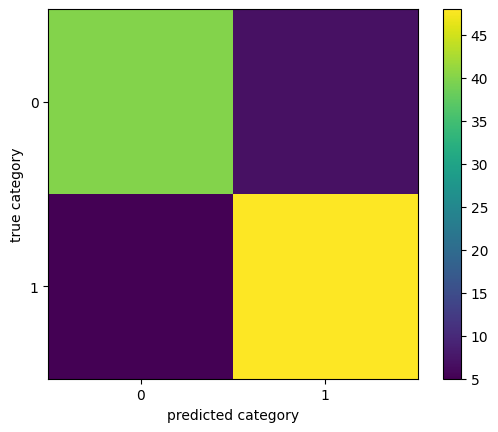

In [ ]:
# to_remove solution

# Generate 100 numbers from a Gaussian distribution with zero mean 
x_1_test2 = np.random.randn(data_points)
x_2_test2 = np.random.randn(data_points)

# Create an array of x values
regressors_test2 = np.array([x_1_test2, x_2_test2])

#Assuming a different relationship (alpha = .8), we can calculate the true y values:
alpha = .8
y_test2 = y_func(np.array([alpha,1-alpha]), regressors_test2,beta)

# Use the logistic regression model to make predictions on the new x values
preds = logreg_model.predict(regressors_test2.T)

# Calculate the confusion matrix for the model's predictions
cm = confusion_matrix(y_test2, preds)

# Visualize the confusion matrix as an image with labeled ticks
plt.imshow(cm); plt.xticks([0,1]); plt.yticks([0,1])
plt.ylabel('true category'); plt.xlabel('predicted category')
plt.colorbar()

# Print the percent of correct predictions by the logistic regression model
'Percent correct is ' + str(100*logreg_model.score(regressors_test2.T, y_test2))

We can see the accuracy has dropped!

What do you conclude from this?



---


# **Summary**

Estimated timing of tutorial: 

In this tutorial we implemented logistic regression with scikit learn and anlysed the learned model's performance in different scenario's like seen and unseen data.

---

